## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/resume projects/Malaria-Detection-master/cell_images/Train'
valid_path = '/content/drive/MyDrive/resume projects/Malaria-Detection-master/cell_images/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in VGG19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/resume projects/Malaria-Detection-master/Dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/resume projects/Malaria-Detection-master/Dataset/Train/Parasite',
 '/content/drive/MyDrive/resume projects/Malaria-Detection-master/Dataset/Train/Uninfected']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(VGG19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/resume projects/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/resume projects/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 22s 2s/step - loss: 2.6698 - accuracy: 0.4856 - val_loss: 0.6392 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 21s 2s/step - loss: 0.7008 - accuracy: 0.5288 - val_loss: 0.7065 - val_accuracy: 0.3731
Epoch 3/50
13/13 [==============================] - 21s 2s/step - loss: 0.6882 - accuracy: 0.5697 - val_loss: 0.6936 - val_accuracy: 0.4925
Epoch 4/50
13/13 [==============================] - 21s 2s/step - loss: 0.6854 - accuracy: 0.5601 - val_loss: 0.6977 - val_accuracy: 0.4478
Epoch 5/50
13/13 [==============================] - 21s 2s/step - loss: 0.6805 - accuracy: 0.5745 - val_loss: 0.7075 - val_accuracy: 0.4328
Epoch 6/50
13/13 [==============================] - 21s 2s/step - loss: 0.6769 - accuracy: 0.5601 - val_loss: 0.6668 - val_accuracy: 0.6269
Epoch 7/50
13/13 [==============================] - 21s 2s/step - loss: 0.6379 - accuracy: 0.6490 - val_loss: 0.7875 - val_accuracy: 0.3955
Epoch 8/50
13/13 [==

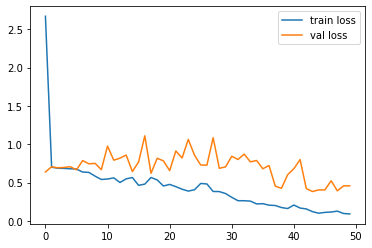

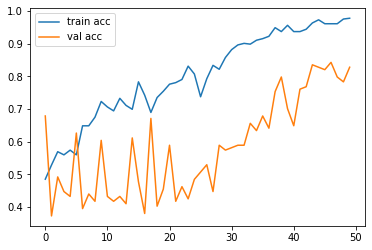

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/resume projects/Malaria-Detection-master/model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[2.43242815e-01, 7.56757200e-01],
       [9.99170899e-01, 8.29135999e-04],
       [7.30994493e-02, 9.26900625e-01],
       [8.03595334e-02, 9.19640481e-01],
       [6.60315156e-01, 3.39684814e-01],
       [8.96303177e-01, 1.03696808e-01],
       [1.46416938e-02, 9.85358357e-01],
       [8.34666789e-01, 1.65333226e-01],
       [5.26698649e-01, 4.73301321e-01],
       [6.02055062e-03, 9.93979454e-01],
       [5.59509322e-02, 9.44049120e-01],
       [6.80142045e-01, 3.19857985e-01],
       [9.73349273e-01, 2.66507324e-02],
       [2.98226122e-02, 9.70177412e-01],
       [1.81780998e-02, 9.81821954e-01],
       [9.99182045e-01, 8.17987428e-04],
       [9.61096823e-01, 3.89031097e-02],
       [2.01437235e-01, 7.98562765e-01],
       [9.99993563e-01, 6.41202632e-06],
       [7.99892023e-02, 9.20010805e-01],
       [7.54232466e-01, 2.45767534e-01],
       [2.71589421e-02, 9.72841024e-01],
       [7.45567083e-01, 2.54432857e-01],
       [9.98223722e-01, 1.77627313e-03],
       [1.143328

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/resume projects/Malaria-Detection-master/model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/resume projects/Malaria-Detection-master/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
